In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
%matplotlib inline

In [24]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
datafilename='../data/transmissions-LSST.dat'

In [4]:
df=pd.read_csv(datafilename,names=['wl','Topt','Tccd','U','G','R','I','Z','Y4','atm'],sep='\t')

In [5]:
wl=df['wl']
U=df['U']/100.
G=df['G']/100.
R=df['R']/100.
I=df['I']/100.
Z=df['Z']/100.
Y4=df['Y4']/100.

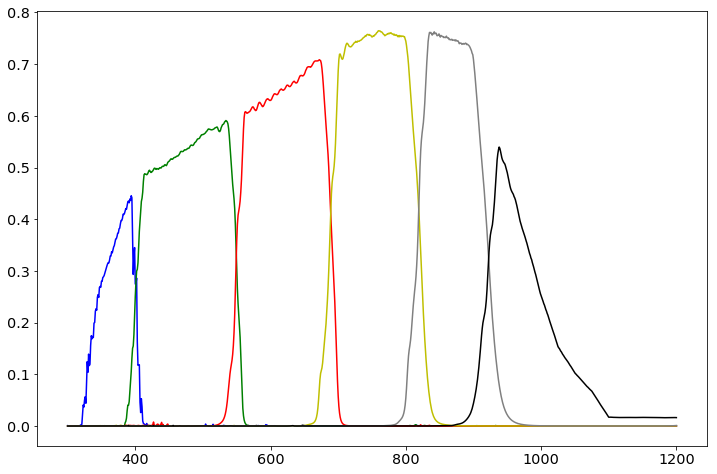

In [6]:
plt.plot(wl,U,'b')
plt.plot(wl,G,'g')
plt.plot(wl,R,'r')
plt.plot(wl,I,'y')
plt.plot(wl,Z,'grey')
plt.plot(wl,Y4,'k')

In [7]:
file_atm_min='libradtrandata/UVSPEC_REPTRAN_SOLAR_ALT26_COARSE_qpwv5_10.out'
file_atm_max='libradtrandata/UVSPEC_REPTRAN_SOLAR_ALT26_COARSE_qpwv95_10.out'

In [8]:
array_atm_min=np.loadtxt(file_atm_min)
array_atm_max=np.loadtxt(file_atm_max)

In [9]:
wl_atm_min=array_atm_min[:,0]
trans_atm_min=array_atm_min[:,1]
wl_atm_max=array_atm_max[:,0]
trans_atm_max=array_atm_max[:,1]

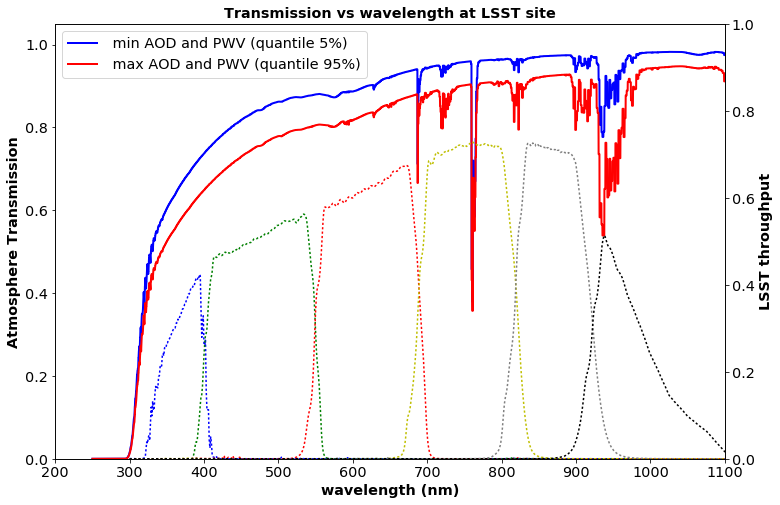

In [11]:
fig, ax1 = plt.subplots()

ax1.plot(wl_atm_min, trans_atm_min,'b',lw=2,label=' min AOD and PWV (quantile 5%)')
ax1.plot(wl_atm_max, trans_atm_max,'r',lw=2,label=' max AOD and PWV (quantile 95%)')

ax1.plot(wl,U,'b:', label="_nolegend_")
ax1.plot(wl,G,'g:',label="_nolegend_")
ax1.plot(wl,R,'r:',label="_nolegend_")
ax1.plot(wl,I,'y:',label="_nolegend_")
ax1.plot(wl,Z,color='grey',ls=':',label="_nolegend_")
ax1.plot(wl,Y4,'k:',label="_nolegend_")
ax1.set_title("Transmission vs wavelength at LSST site",fontweight='bold')
ax1.set_xlabel("wavelength (nm)",fontweight='bold')
ax1.set_ylabel("Atmosphere Transmission",fontweight='bold')
plt.legend(loc=2)
plt.ylim(0.,1.05)
plt.xlim(200.,1100)

ax2 = ax1.twinx()
ax2.set_ylabel("LSST throughput",fontweight='bold')
plt.savefig("AtmTransparency_LSST_AER_PWV.jpg")

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


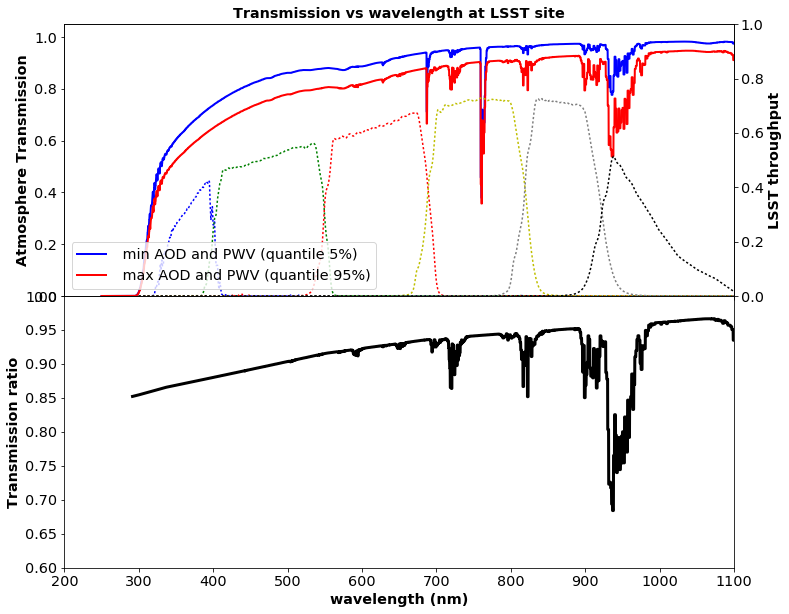

In [36]:

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

rapport=trans_atm_max/trans_atm_min
ax1.plot(wl_atm_min, trans_atm_min,'b',lw=2,label=' min AOD and PWV (quantile 5%)')
ax1.plot(wl_atm_max, trans_atm_max,'r',lw=2,label=' max AOD and PWV (quantile 95%)')


ax1.plot(wl,U,'b:', label="_nolegend_")
ax1.plot(wl,G,'g:',label="_nolegend_")
ax1.plot(wl,R,'r:',label="_nolegend_")
ax1.plot(wl,I,'y:',label="_nolegend_")
ax1.plot(wl,Z,color='grey',ls=':',label="_nolegend_")
ax1.plot(wl,Y4,'k:',label="_nolegend_")
ax1.set_title("Transmission vs wavelength at LSST site",fontweight='bold')
#ax1.set_xlabel("wavelength (nm)",fontweight='bold')
ax1.set_ylabel("Atmosphere Transmission",fontweight='bold')
ax1.legend(loc=3)
ax1.set_ylim(0.,1.05)
ax1.set_xlim(200.,1100)

ax3 = ax1.twinx()
ax3.set_ylabel("LSST throughput",fontweight='bold')

ax2.plot(wl_atm_min, rapport,'k',lw=3,label=' ratio max/min AOD and PWV ')
ax2.set_ylim(0.6,1.)
ax2.set_xlim(200.,1100)
ax2.set_xlabel("wavelength (nm)",fontweight='bold')
ax2.set_ylabel("Transmission ratio",fontweight='bold')
#ax4 = ax2.twinx()
#ax4.set_ylim(0.6,1.)

f.subplots_adjust(hspace=0)
plt.savefig("AtmTransparency_LSST_AER_PWV_ratio.jpg")